# Preliminary Results

## Load Libraries

In [2]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(gridExtra)
suppressWarnings(library(cowplot))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Data Intake and Pre-Processing

<mark>TODO</mark>: insert some text to explain what we are doing

In [3]:
data <- read.csv(file = "data/athlete_events.csv")

In [4]:
processed_df <- data[order(data$Year),]  %>% 
    filter(!is.na(Age)) %>% # get rid of NA/Age
    filter(!is.na(Medal))
    # we should get rid of anyone who didn't win a medal either - does NA in the medal mean they didn't win or they don't know
    # also, let's decide if we care about bronze/silver as opposed to just looking at gold

first_time_only <- processed_df[match(unique(processed_df$ID), processed_df$ID),] # only first time winners now, if they won a second time, it was excluded
# I think this works, someone check though
    
winter_df <- first_time_only %>% 
    filter(Season == "Winter")

summer_df <- first_time_only %>% 
    filter(Season == "Summer")

head(first_time_only)
head(winter_df)
head(summer_df)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,12068,Arthur Charles Blake,M,24,NA,NA,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver
2,12563,Conrad Helmut Fritz Bcker,M,25,NA,NA,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
4,12929,John Mary Pius Boland,M,25,NA,NA,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Gold
6,16616,"Thomas Edmund ""Tom"" Burke",M,21,183,66,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,Gold
8,17492,Eugne Henri Callot,M,20,NA,NA,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver
9,18785,Demetrius Emmanuel Casdagli,M,23,NA,NA,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Silver


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,391,Clarence John Abel,M,23,185,102,United States,USA,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver
2,1341,Johan Petter hln (Andersson-),M,44,NA,NA,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Silver
3,3872,William Harding Anderson,M,22,NA,NA,Great Britain,GBR,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,4060,Georges Jules Andr,M,47,NA,NA,France,FRA,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Bronze
5,5232,Thomas Alfred Arnold,M,22,NA,NA,Great Britain-1,GBR,1924 Winter,1924,Winter,Chamonix,Bobsleigh,Bobsleigh Men's Four/Five,Silver
6,5932,Alfred Aufdenblatten,M,26,NA,NA,Switzerland,SUI,1924 Winter,1924,Winter,Chamonix,Military Ski Patrol,Military Ski Patrol Men's Military Ski Patrol,Gold


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,12068,Arthur Charles Blake,M,24,NA,NA,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Silver
2,12563,Conrad Helmut Fritz Bcker,M,25,NA,NA,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold
3,12929,John Mary Pius Boland,M,25,NA,NA,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Gold
4,16616,"Thomas Edmund ""Tom"" Burke",M,21,183,66,United States,USA,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 100 metres,Gold
5,17492,Eugne Henri Callot,M,20,NA,NA,France,FRA,1896 Summer,1896,Summer,Athina,Fencing,"Fencing Men's Foil, Individual",Silver
6,18785,Demetrius Emmanuel Casdagli,M,23,NA,NA,Greece,GRE,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Silver


In [7]:
# check if each of the athlete in the two dataframes only has 1 medal each (in this case it means first time winning a medal)
# empty dataframe means our dataframes only contain the first medal won by each athlete

winter_df %>%
        group_by(ID) %>%
        summarize(count = sum(!is.na(Medal))) %>%
        filter(count > 1)

summer_df %>%
        group_by(ID) %>%
        summarize(count = sum(!is.na(Medal))) %>%
        filter(count > 1)

# test passed!

ID,count
<int>,<int>


ID,count
<int>,<int>


In [17]:
# test to see if the combined number of rows equal to the number of unique athlete in our processed df.
length(unique(processed_df$ID)) == nrow(summer_df) + nrow(winter_df)

# test passed!

[1] TRUE

Warning message:
“Use of `winter_df$Age` is discouraged. Use `Age` instead.”
Warning message:
“Use of `winter_df$Age` is discouraged. Use `Age` instead.”
Warning message:
“Use of `summer_df$Age` is discouraged. Use `Age` instead.”
Warning message:
“Use of `summer_df$Age` is discouraged. Use `Age` instead.”


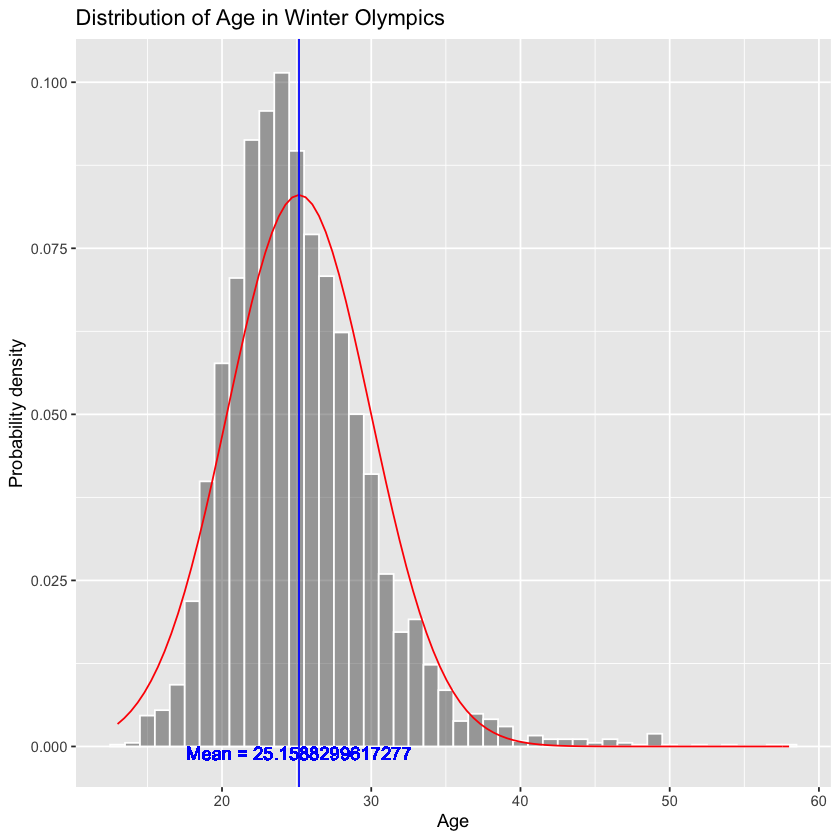

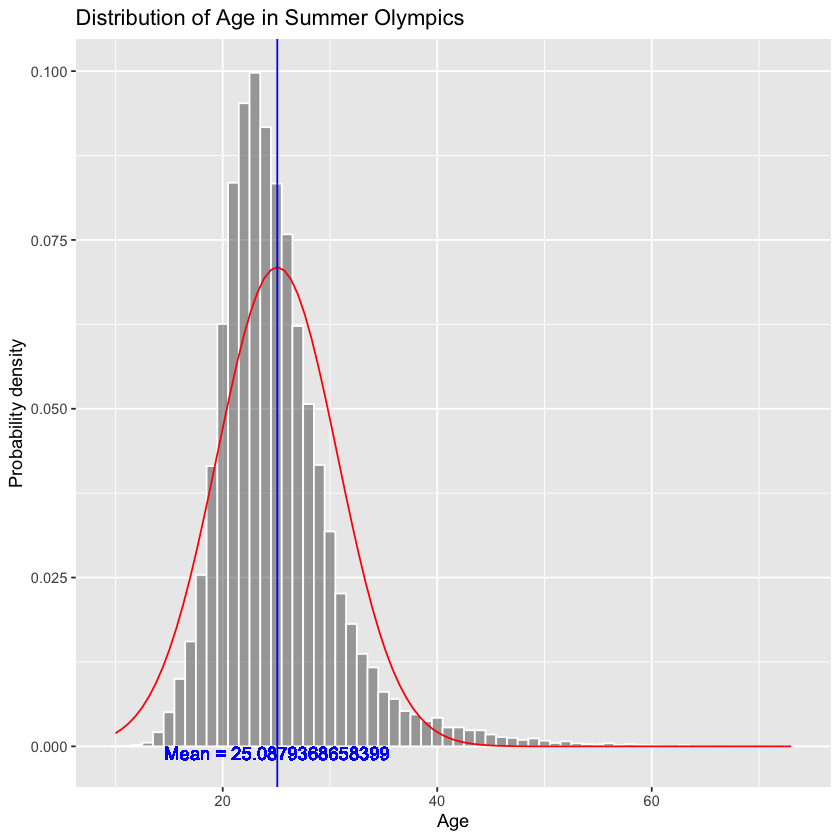

In [63]:
# histograms layered with Gaussian distribution curve, the height of each bar rerpresent the count.
# since it is layered with the bell curve, the count also represent the repsective probability.

winter_df %>%
        ggplot(aes(x=Age)) +
        geom_histogram(aes(y=..density..),binwidth=1, color="white", alpha=0.5) +
        stat_function(fun=dnorm, color="red", args=list(mean=mean(winter_df$Age), 
                                                        sd=sd(winter_df$Age))) +
        geom_vline(xintercept = mean(winter_df$Age), color="blue") +
        geom_text(aes(x = mean(winter_df$Age), 
                      y=-0.001, 
                      label=paste0("Mean = ", mean(winter_df$Age))),
                  color="blue") +
        labs(x="Age", y="Probability density", title="Distribution of Age in Winter Olympics")

summer_df %>%
        ggplot(aes(x=Age)) +
        geom_histogram(aes(y=..density..),binwidth=1, color="white", alpha=0.5) +
        stat_function(fun=dnorm, color="red", args=list(mean=mean(summer_df$Age), 
                                                        sd=sd(summer_df$Age))) +
        geom_vline(xintercept = mean(summer_df$Age), color="blue") +
        geom_text(aes(x = mean(summer_df$Age), 
                      y=-0.001, 
                      label=paste0("Mean = ", mean(summer_df$Age))),
                  color="blue") +
        labs(x="Age", y="Probability density", title="Distribution of Age in Summer Olympics")
